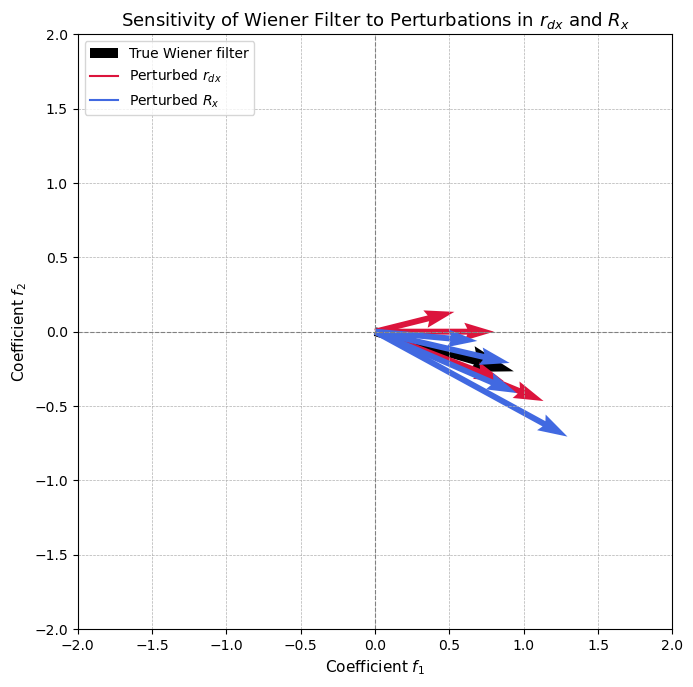

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set up true parameters
R_x_true = np.array([[1.0, 0.5], [0.5, 1.0]])
r_dx_true = np.array([0.8, 0.2])
f_true = np.linalg.solve(R_x_true, r_dx_true)

# Multiple perturbations of r_dx
delta_rdx_list = [
    np.array([ 0.0,  0.2]),
    np.array([-0.2,  0.2]),
    np.array([ 0.1, -0.1]),
    np.array([-0.1, -0.1])
]

# Multiple perturbations of R_x
delta_Rx_list = [
    np.array([[0.0,  0.0], [0.0,  0.2]]),
    np.array([[0.2, -0.1], [-0.1, 0.2]]),
    np.array([[0.1,  0.1], [0.1, -0.1]]),
    np.array([[0.0,  0.2], [0.2,  0.0]])
]

# Compute perturbed filters
f_rdx_perturbed = [np.linalg.solve(R_x_true, r_dx_true + dr) for dr in delta_rdx_list]
f_Rx_perturbed = [np.linalg.solve(R_x_true + dR, r_dx_true) for dR in delta_Rx_list]

# Plotting
fig, ax = plt.subplots(figsize=(7, 7))
origin = np.array([[0, 0]]).T

# True filter
ax.quiver(*origin, f_true[0], f_true[1], color='black', scale=1, angles='xy', scale_units='xy',
          width=0.015, label='True Wiener filter')

# All r_dx perturbations (same color)
for f in f_rdx_perturbed:
    ax.quiver(*origin, f[0], f[1], color='crimson', scale=1, angles='xy', scale_units='xy', width=0.01)
ax.plot([], [], color='crimson', label='Perturbed $r_{dx}$')  # for legend

# All R_x perturbations (same color)
for f in f_Rx_perturbed:
    ax.quiver(*origin, f[0], f[1], color='royalblue', scale=1, angles='xy', scale_units='xy', width=0.01)
ax.plot([], [], color='royalblue', label='Perturbed $R_x$')  # for legend

# Formatting
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Labels and title
ax.set_title('Sensitivity of Wiener Filter to Perturbations in $r_{dx}$ and $R_x$', fontsize=13)
ax.set_xlabel('Coefficient $f_1$', fontsize=11)
ax.set_ylabel('Coefficient $f_2$', fontsize=11)
ax.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()
